In [2]:
#Step 1: Load the Dataset

import pandas as pd

# Load dataset
df = pd.read_csv("sales_data_generated.csv")

# Display first few rows
print(df.head())

    Product Region    Sales   Profit  Discount         Category        Date
0  Keyboard  South  1007.15   530.79     20.18      Accessories  2023-01-01
1   Monitor   East  2755.31   501.49     23.90      Electronics  2023-01-02
2   Printer  North  4377.43  1813.45      7.51      Electronics  2023-01-03
3  Keyboard  North  3687.90   506.60     18.75  Office Supplies  2023-01-04
4    Tablet  North  4052.15   551.18     17.15  Office Supplies  2023-01-05


In [5]:
#Step 2: Data Cleaning
#Check for Missing Values:
print(df.isnull().sum())  # Check missing values
#If any missing values exist, fill them using:
df.fillna(df.select_dtypes(include=["number"]).mean(), inplace=True)
#Remove Duplicates:
df.drop_duplicates(inplace=True)
#Convert Date Column to Datetime Format:
df["Date"] = pd.to_datetime(df["Date"])




Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [6]:
#Step 3: Exploratory Data Analysis (EDA)
#1. Statistical Summary
print(df.describe())  # Summary statistics


             Sales       Profit     Discount                 Date
count  1000.000000  1000.000000  1000.000000                 1000
mean   2584.384970  1009.787290    14.711090  2024-05-14 12:00:00
min     115.770000    10.020000     0.020000  2023-01-01 00:00:00
25%    1281.265000   530.085000     7.257500  2023-09-07 18:00:00
50%    2641.795000  1006.220000    14.530000  2024-05-14 12:00:00
75%    3826.277500  1520.615000    22.125000  2025-01-19 06:00:00
max    4997.130000  1995.660000    29.990000  2025-09-26 00:00:00
std    1431.730452   578.441773     8.594567                  NaN


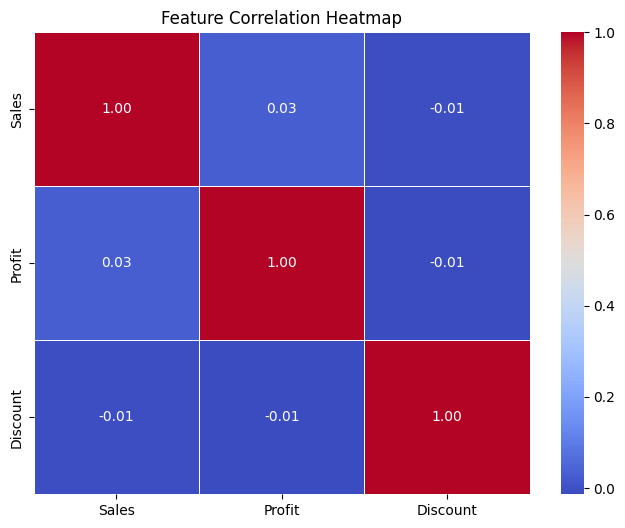

In [8]:
#2. Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Check if there are numeric columns to avoid an empty heatmap
if not numeric_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")



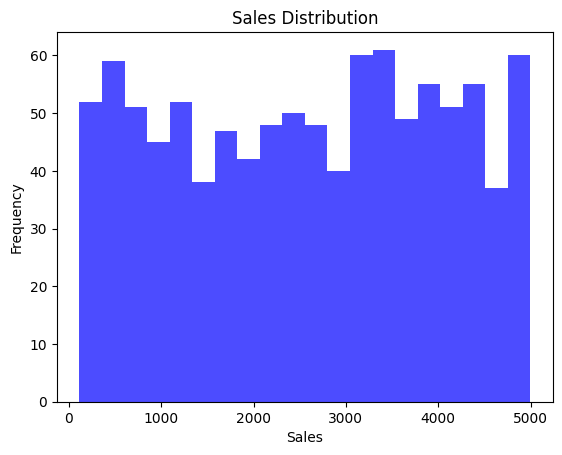

In [9]:
#3. Sales Distribution (Histogram)
plt.hist(df["Sales"], bins=20, color="blue", alpha=0.7)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


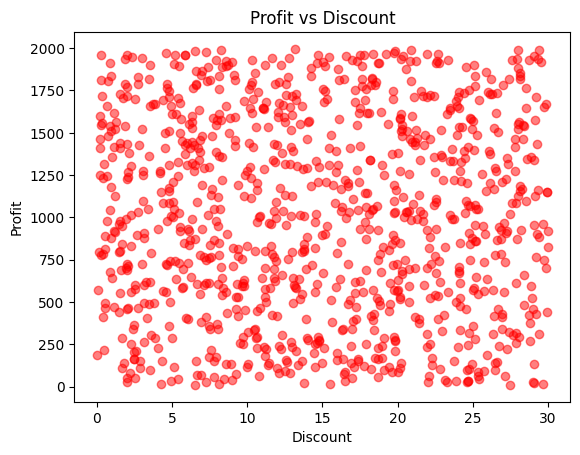

In [10]:
#4. Profit vs Discount (Scatter Plot)
plt.scatter(df["Discount"], df["Profit"], alpha=0.5, color="red")
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


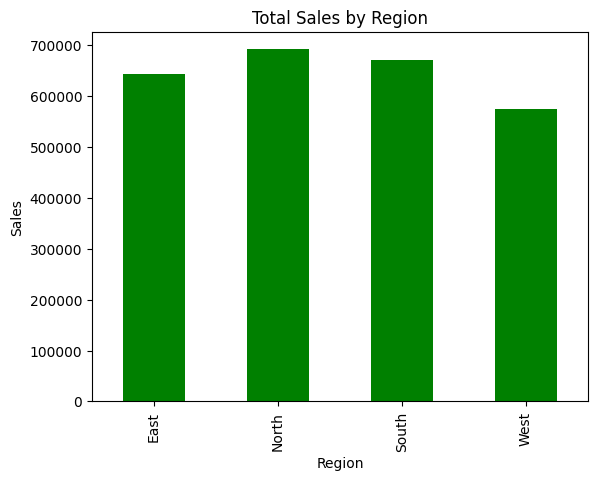

In [11]:
#5. Sales by Region (Bar Chart)
df.groupby("Region")["Sales"].sum().plot(kind="bar", color="green")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()


In [17]:
#Step 4: Sales Prediction Using Linear Regression


#1. Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#2. Define Features and Target Variable
X = df[["Profit", "Discount"]]  # Features
y = df["Sales"]  # Target variable
#3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#4. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
#5. Make Predictions
y_pred = model.predict(X_test)
#6. Evaluate Model Performance
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))



R² Score: -0.014633246731678096
Mean Squared Error: 2066141.023289526
